### Student Details

Student name: Cathaoir Agnew

Student ID: 16171659

# Option 2: Linear and non-linear SVM

## Part 1: Multi-class Linear SVM

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels 
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2
2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Print the scaled data
4. Train an instance of the scikitlearn sklearn.svm SVC (Support Vector Classifier) algorithm on the provided data
    1. You can use all the default parameters, except set the kernel to linear
5. Plot the decision boundary using the supplied plot_decision_boundary function
6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

### Part 1 Task 1 
Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels 

    Iris-setosa = 0 
    Iris-versicolor = 1 
    Iris-virginica = 2 


In [1]:
# loading data in 

import pandas as pd
df = pd.read_csv('iris_data.csv', header=0)

In [2]:
# quick glance at data
print(df.head())

   sepal_length   sepa_width   petal_length   petal_width        class
0           5.1          3.5            1.4           0.2  Iris-setosa
1           4.9          3.0            1.4           0.2  Iris-setosa
2           4.7          3.2            1.3           0.2  Iris-setosa
3           4.6          3.1            1.5           0.2  Iris-setosa
4           5.0          3.6            1.4           0.2  Iris-setosa


In [3]:
# quick glance at columns
print(df.columns)

Index(['sepal_length', ' sepa_width', ' petal_length', ' petal_width',
       ' class'],
      dtype='object')


In [4]:
# unique values in the class column
print(df.iloc[:,4].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Website of where I found useful information on how to recode variables/ label encode. 

https://pbpython.com/categorical-encoding.html

As the labels in the data set appear in order, setosa 1st , versicolour 2nd , virginica 3rd. This cat codes works fine without any tweaking, as the order of the classes that appear,  match up with how cat code will relabel them.

    Iris-setosa = 0 
    Iris-versicolor = 1 
    Iris-virginica = 2 

In [5]:
# turning column into type category & then using cat-codes to convert to numbers, from above link 
df[" class"] = df[" class"].astype('category')

# creating a new column, just so I dont overwrite and lose the info
df["class_cat"] = df[" class"].cat.codes


# petal length and petal width
X = df.iloc[:, [2,3]].values

# now since we taking all flower types and not specific below makes more sense to use 
y = df['class_cat'].values

# rather than below, as above is more readible, but both work 
#Y = df.iloc[:, 5]

### Part 1 task 2 

Use the scikit-learn train_test_split function to split into 30% test and 70% training data.

Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data. 

In [6]:
from sklearn.model_selection import train_test_split

# set random_state to a fixed number, so while the outcome is random, it is repeatible (same result each time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=43 , stratify = y ) 

### Part 1 task 3

Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data  

Print the scaled data 

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# You fit standard scaler on training data, but apply to both train & test

# fitting and transforming training data
X_train_scale = scaler.fit_transform(X_train)

# only transform here, as fit on training data
X_test_scale = scaler.transform(X_test)

# print scaled x train
print(X_train_scale)

[[-1.35170127 -1.17851345]
 [-1.1786879  -1.17851345]
 [ 0.43610354  0.39951731]
 [ 0.55144578  0.26801475]
 [ 0.78213027  1.45153782]
 [-1.1786879  -1.31001601]
 [-1.35170127 -1.31001601]
 [ 0.43610354  0.13651218]
 [-1.46704351 -1.31001601]
 [ 0.26309017  0.13651218]
 [ 1.18582813  1.32003525]
 [ 1.3588415   1.45153782]
 [-1.58238576 -1.31001601]
 [ 0.55144578  0.26801475]
 [ 0.0900768  -0.12649294]
 [ 0.66678803  0.39951731]
 [-0.4289633  -0.12649294]
 [ 1.12815701  1.71454294]
 [ 0.0900768   0.26801475]
 [ 0.03240568 -0.12649294]
 [ 0.60911691  0.26801475]
 [ 0.37843242  0.00500962]
 [-1.35170127 -1.31001601]
 [-1.35170127 -1.31001601]
 [ 1.70486824  1.32003525]
 [ 1.07048589  0.794025  ]
 [ 0.26309017  0.39951731]
 [ 0.20541905 -0.2579955 ]
 [ 0.0900768   0.00500962]
 [ 0.20541905  0.13651218]
 [-1.40937239 -1.31001601]
 [-1.29403015 -1.31001601]
 [ 1.12815701  1.45153782]
 [ 0.72445915  0.92552756]
 [-1.52471464 -1.44151857]
 [-1.29403015 -1.17851345]
 [-1.29403015 -1.44151857]
 

In [8]:
# print scaled x test
print(X_test_scale)

[[-1.29403015 -1.04701088]
 [ 0.66678803  0.794025  ]
 [ 0.55144578  0.53101987]
 [ 0.49377466  0.26801475]
 [ 1.18582813  0.794025  ]
 [-0.02526544 -0.2579955 ]
 [ 0.55144578  0.00500962]
 [ 1.30117038  0.794025  ]
 [-1.35170127 -1.31001601]
 [ 0.14774792  0.13651218]
 [-1.1786879  -0.91550832]
 [-0.25594994 -0.2579955 ]
 [-1.46704351 -1.31001601]
 [-1.29403015 -1.44151857]
 [ 0.78213027  0.39951731]
 [ 0.66678803  0.794025  ]
 [ 1.3588415   1.71454294]
 [-0.08293657  0.13651218]
 [-1.23635902 -1.31001601]
 [ 1.82021049  1.45153782]
 [-1.35170127 -1.31001601]
 [ 1.07048589  1.58304038]
 [ 0.14774792  0.00500962]
 [ 0.32076129  0.13651218]
 [ 0.43610354  0.39951731]
 [-1.23635902 -1.31001601]
 [ 0.78213027  0.92552756]
 [ 0.43610354  0.53101987]
 [-1.35170127 -1.31001601]
 [ 0.14774792  0.13651218]
 [ 0.26309017  0.13651218]
 [ 1.07048589  1.58304038]
 [-1.40937239 -1.04701088]
 [ 1.70486824  1.05703013]
 [ 1.64719712  1.18853269]
 [ 1.12815701  1.18853269]
 [-1.29403015 -1.31001601]
 

### Part 1 task 4

Train an instance of the scikitlearn sklearn.svm SVC (Support Vector Classifier) algorithm on the provided data.

You can use all the default parameters, except set the kernel to linear 

In [9]:
from sklearn.svm import SVC

# initialize SVM classifier 
svm_clf = SVC(kernel = 'linear') 

# train classifier 
svm_clf.fit(X_train_scale, y_train)

SVC(kernel='linear')

### Part 1 task 5

Plot the decision boundary using the supplied plot_decision_boundary function 

Provided by Ciaran on GitLab

In [10]:
# From https://jonchar.net/notebooks/Artificial-Neural-Network-with-Keras/

import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)
    
    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)
    ax.set_title("Decision Boundary Plot")
    
    return fig, ax


Taking on Peter Gleeson's advice on my forum post, of adding labels on my plots. As I stored X as petal length , petal width, to keep consistency 

x1 = petal length (this will be x-axis) ,  x2 = petal width (this will be y-axis) 

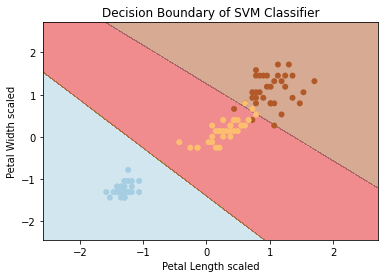

In [11]:
plot_decision_boundary(X_train_scale, y_train, svm_clf, steps=1000, cmap='Paired')
plt.title("Decision Boundary of SVM Classifier")
plt.xlabel('Petal Length scaled')
plt.ylabel('Petal Width scaled')
plt.show()

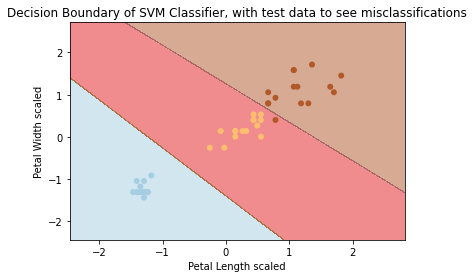

In [12]:
plot_decision_boundary(X_test_scale, y_test, svm_clf, steps=1000, cmap='Paired')
plt.title("Decision Boundary of SVM Classifier, with test data to see misclassifications")
plt.xlabel('Petal Length scaled')
plt.ylabel('Petal Width scaled')
plt.show()

### Part 1 Task 6

Using sklearn's accuracy_score, calculate the accuracy score on the test data 

In [13]:
from sklearn.metrics import accuracy_score

y_pred = svm_clf.predict(X_test_scale)

# Printing out the accuracy score on the X test 
print("SVM Classifier accuracy (in %):", accuracy_score(y_test , y_pred)*100)

SVM Classifier accuracy (in %): 97.77777777777777
